In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Data import

In [47]:
# Import training data
tr_data = genfromtxt('train.csv', delimiter=',')
tr_data = numpy.delete(tr_data,(0), axis=0) #delete header
tr_data = numpy.delete(tr_data,(0), axis=1) #delete Id
y_tr = tr_data[:,0] #get y
x_tr = numpy.delete(tr_data,(0), axis=1) #delete y and get x

# Import test data
tst_data = genfromtxt('test.csv', delimiter=',')
tst_data = numpy.delete(tst_data,(0), axis=0) #delete header
nindex = tst_data[:,0] #nindex is an index array
x_tst = numpy.delete(tst_data,(0), axis=1)

# Scale training and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_tr)  # Don't cheat - fit only on training data
x_tr_scaled = scaler.transform(x_tr)
x_tst_scaled = scaler.transform(x_tst)  # apply same transformation to test data

# Classify

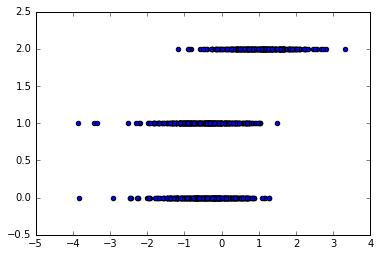

In [48]:
#for i in range(len(x_tr[0,:])):
scatter(x_tr_scaled[:,2],y_tr)

In [50]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(x_tr_scaled, y_tr)
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

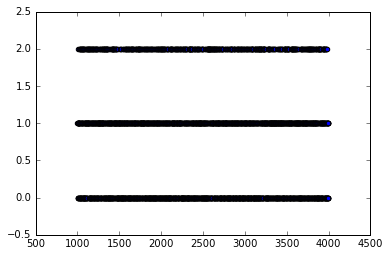

In [52]:
y_tst=clf.predict(x_tst_scaled)
scatter(nindex,y_tst)

In [54]:
index = []
for i in arange(y_tst.size):
    index.append(int(nindex[i]))

y_tst_int = []
for i in arange(y_tst.size):
    y_tst_int.append(int(y_tst[i]))
import csv
with open('result2.csv', 'w') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(('Id','y'))
    a.writerows(zip(index,y_tst_int))